In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
%matplotlib inline

predict continuos variables - regression

### Simple linear regression

y = b0 + b1X1

y => dependent variable
b0 => y intercept
b1 => slope coefficient 
X1 => independent variable

y<sub>i</sub> - y<sub>i</sub><sup>^</sup> = residuals

sum(residuals) => Ordinary least square method

In [2]:
df = pd.read_csv("Salary_Data.csv")
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [3]:
df.shape

(30, 2)

In [4]:
df.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

In [5]:
df.dtypes

YearsExperience    float64
Salary             float64
dtype: object

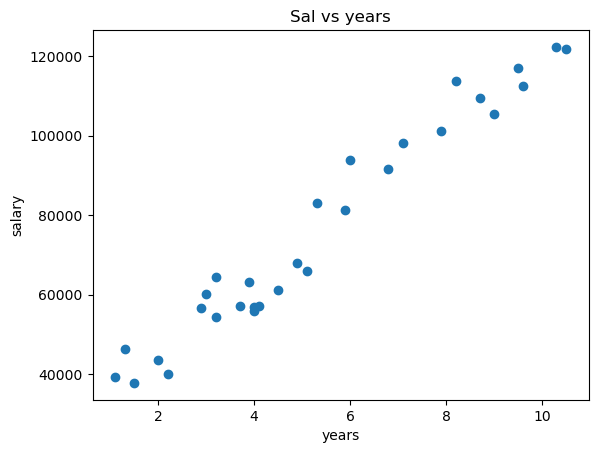

In [6]:
plt.scatter(df.YearsExperience,df.Salary); # linear increase
plt.xlabel("years")
plt.ylabel("salary")
plt.title("Sal vs years");

In [7]:
from sklearn.model_selection import train_test_split

X = df.drop("Salary",axis=1)
y = df.Salary

X_train,X_test,y_train,y_test = train_test_split(X,
                                                 y,
                                                 test_size=0.2)

In [8]:
from sklearn.linear_model import LinearRegression

np.random.seed(42)
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [9]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((24, 1), (6, 1), (24,), (6,))

In [10]:
regressor.score(X_test,y_test)

0.9599917434459071

In [11]:
y_preds = regressor.predict(X_test)
y_preds

array([ 36269.40942673, 108407.90963196,  63795.94239978, 116950.62676153,
        64745.13319196,  76135.42269804])

In [12]:
from sklearn.metrics import mean_absolute_error,r2_score
mean_absolute_error(y_preds,y_test)

4977.993432754139

In [13]:
r2_score(y_preds,y_test) # accuracy

0.9599080653773272

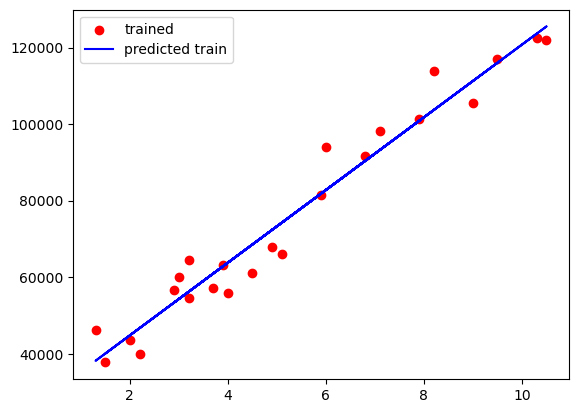

In [14]:
fig,ax = plt.subplots()
ax.scatter(X_train,y_train,color="r",label="trained")
ax.plot(X_train,regressor.predict(X_train),color="b",label="predicted train");
ax.legend();

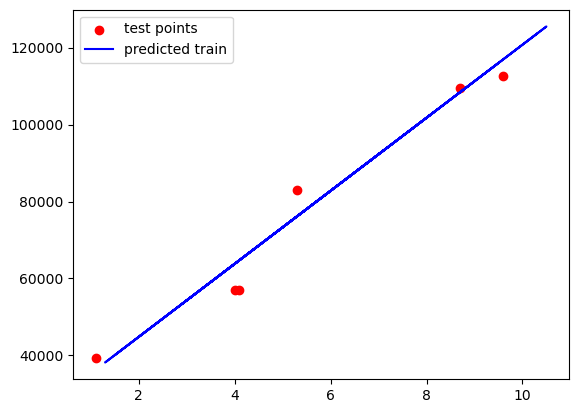

In [15]:
plt.scatter(X_test,y_test,label="test points",color="r")
plt.plot(X_train,regressor.predict(X_train),label="predicted train",color="b")
plt.legend();

### How do I predict the salary if input ("YearsOfGiven") as 12 - To make single prediction

In [16]:
regressor.predict([[12]])

C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([139731.2057737])

How to get the values for <b>b<sub>0</sub></b> and <b>b<sub>1</sub></b>

In [17]:
regressor.coef_,regressor.intercept_

(array([9491.90792174]), 25828.31071281981)

### Multiple linear regression

In [18]:
df_mlr =  pd.read_csv("50_Startups.csv")
df_mlr.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [19]:
df_mlr.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [20]:
df_mlr.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

multiple linear regression intuition for categorical variables

* never add two dummy variables in the dataset
* D1 , D2 dummy variables 
* intuition is your are duplicating the variable ->  D2 = 1 - D1 (always)

* phenomenon where one or more independent varibles determine the other - > multicolinearility

* <b>dummy variable trap</b> - always eliminate one dummy varible independent of how many dummy variables you have

#### Backward elimination

5 methods for building models

* All in one - prior knowledge, you have to choose all features, preparing for backward elimination
* Backward elimination
* Forward selection
* Bidirectional elimination
* Score comparison

First 3 Stepwise regression

### Backward elimination

* Select significance level to stay in the model
* Fit the full model with all possible predictors
* Consider the predictor with highest P-value P> significance level
* Remove this predictor
* Rebuild the model without the variable
* Loop through until P< significance level

### Forward selection

* 1)Slect significance to enter the model
* 2)Fit all possible simple rergession models.Slect the one with lowest value
* 3)Keep this variable and fit all possible models with one extra predictor added to the ones you already have
* 4)Consider the predictor with lowest P-value. If P<SL move to step


In [21]:
df_mlr.shape

(50, 5)

In [22]:
df_mlr.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [23]:
df_mlr.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

In [24]:
def object_To_categorical(df):
    for col,val in df.items():
        if(pd.api.types.is_string_dtype(val)):
            df[col] = val.astype("category").cat.as_ordered()
object_To_categorical(df_mlr)

In [25]:
df_mlr.dtypes

R&D Spend           float64
Administration      float64
Marketing Spend     float64
State              category
Profit              float64
dtype: object

In [26]:
def categorical_To_numeric(df):
    for col,val in df.items():
        if not pd.api.types.is_numeric_dtype(val):
            df[col]=df[col].cat.codes+1
            
categorical_To_numeric(df_mlr)

In [27]:
df_mlr.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State                 int8
Profit             float64
dtype: object

In [28]:
df_mlr.State.head()

0    3
1    1
2    2
3    3
4    2
Name: State, dtype: int8

In [29]:
df_mlr.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,3,192261.83
1,162597.70,151377.59,443898.53,1,191792.06
2,153441.51,101145.55,407934.54,2,191050.39
3,144372.41,118671.85,383199.62,3,182901.99
4,142107.34,91391.77,366168.42,2,166187.94


In [30]:
X = df_mlr.drop("Profit",axis=1)
y = df_mlr.Profit

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train2,X_test2,y_train2,y_test2 = train_test_split(X,
                                                 y,
                                                 test_size=0.2)

reg2 = LinearRegression()

reg2.fit(X_train2,y_train2)

LinearRegression()

In [32]:
X_test2.shape,y_test2.shape

((10, 4), (10,))

In [33]:
X_train2.shape,y_train2.shape

((40, 4), (40,))

In [34]:
y_preds = reg2.predict(X_test2)
y_preds

array([126720.66150723,  84909.08961912,  98890.31854876,  46479.31240248,
       129113.18318813,  50968.88397762, 109015.01626803, 100893.57078084,
        97713.73821431, 113085.59056068])

In [35]:
reg2.score(X_test2,y_test2)

0.9000614254946402

In [36]:
reg2.coef_

array([  0.80379465,  -0.06791023,   0.03126059, -16.82030683])

 y = b<sub>0</sub> + b<sub>1</sub>x<sub>1</sub> +  b<sub>2</sub>x<sub>2</sub> + b<sub>3</sub>x<sub>3</sub> + b<sub>4</sub>x<sub>4</sub> 

 y = b<sub>0</sub> + 78x<sub>1</sub> + 69x<sub>2</sub> + 38x<sub>3</sub> - 11x<sub>4</sub>

In [37]:
reg2.intercept_

54097.53715294332

### Polynomial linear regression

In [38]:
df_plr = pd.read_csv("Position_Salaries.csv")
df_plr.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [39]:
X = df_plr.drop(columns=["Position","Salary"],axis=1)
y = df_plr.Salary

In [40]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)

LinearRegression()

In [41]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=2)

X_poly = poly_reg.fit_transform(X)

lin_reg_2 = LinearRegression()

lin_reg_2.fit(X_poly,y)

LinearRegression()

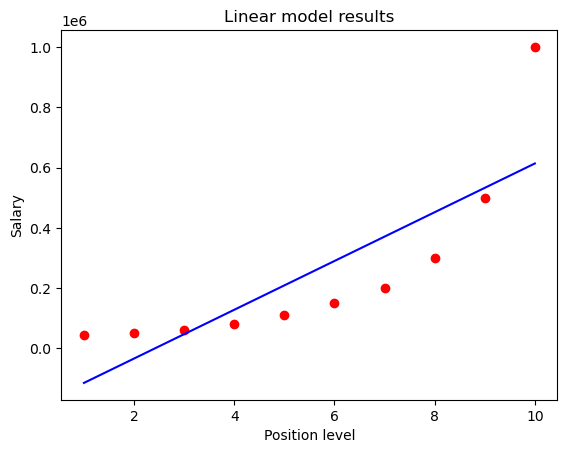

In [42]:
# Visualising the linear regression

plt.scatter(X,y,color="r")
plt.plot(X,lin_reg.predict(X),color="b")
plt.xlabel("Position level")
plt.ylabel("Salary")
plt.title("Linear model results");

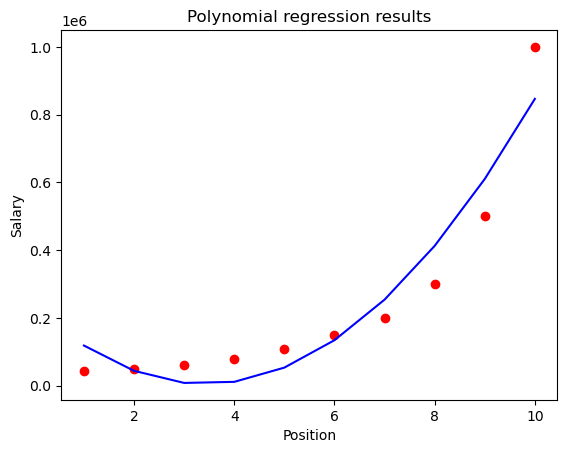

In [43]:
# Visualising the polynomial regression

plt.scatter(X,y,color="r")
plt.plot(X,lin_reg_2.predict(poly_reg.fit_transform(X)),color="b")
plt.xlabel("Position")
plt.ylabel("Salary")
plt.title("Polynomial regression results");

In [44]:
lin_reg.predict([[6.5]])

C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([330378.78787879])

In [45]:
lin_reg_2.predict(poly_reg.fit_transform([[6.5]]))

array([189498.10606061])

### Support Vector Regression

#### Intituition
epsilon - Insensitive tube , SVR considers error of any point outside the tube , Any point outide the tube is Support Vector

slack varibales epsilon<sub>i</sub> .... epsilon<sub>n</sub>

minimize (epsilon<sub>i</sub> + epsilon<sub>n</sub>)

In [93]:
df_svr = pd.read_csv("Position_Salaries.csv")
df_svr

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [94]:
X = df_svr.drop(columns=["Position","Salary"]).values
y = df_svr.Salary.values

In [95]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [96]:
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)

In [97]:
y = y.reshape(len(y),1)
y

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]], dtype=int64)

In [98]:
type(y),type(X)

(numpy.ndarray, numpy.ndarray)

In [99]:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
X = sc_X.fit_transform(X)

sc_y = StandardScaler()
y = sc_y.fit_transform(y)

In [100]:
y

array([[-0.72004253],
       [-0.70243757],
       [-0.66722767],
       [-0.59680786],
       [-0.49117815],
       [-0.35033854],
       [-0.17428902],
       [ 0.17781001],
       [ 0.88200808],
       [ 2.64250325]])

In [101]:
X

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [102]:
min(X),max(X) # -3 to +3 Standardization

(array([-1.5666989]), array([1.5666989]))

In [103]:
min(y),max(y)

(array([-0.72004253]), array([2.64250325]))

In [104]:
from sklearn.svm import SVR

svr = SVR(kernel='rbf')

svr.fit(X,y)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [105]:
# Inverse transformation
sc_y.inverse_transform(svr.predict(sc_X.transform([[5]])).reshape(-1,1))

array([[122574.52250599]])

In [106]:
sc_y.inverse_transform(svr.predict([[5]]).reshape(-1,1))

array([[252791.42303182]])

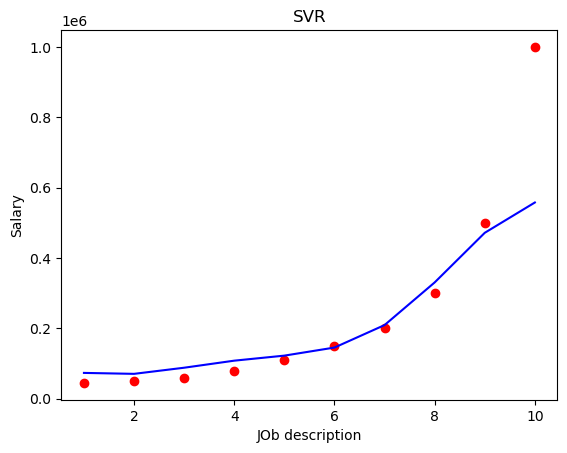

In [118]:
plt.scatter(sc_X.inverse_transform(X),sc_y.inverse_transform(y),color="r");
plt.plot(sc_X.inverse_transform(X),sc_y.inverse_transform(svr.predict(X).reshape(-1,1)),color='b')
plt.title("SVR")
plt.xlabel("JOb description")
plt.ylabel("Salary");

## Decision Tree Regression

### Decision Tree Intuition

Split -> information entropy

yes or no

calcualte average for evry split

In [136]:
dtr = pd.read_csv("Position_Salaries.csv")
dtr.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [151]:
X = dtr.drop(columns=["Salary","Position"],axis=1).values
y = dtr.Salary.values

In [152]:
from sklearn.tree import DecisionTreeRegressor

dec_regressor = DecisionTreeRegressor(random_state=42)

dec_regressor.fit(X,y)

DecisionTreeRegressor(random_state=42)

In [153]:
dec_regressor.predict([[5]])

array([110000.])

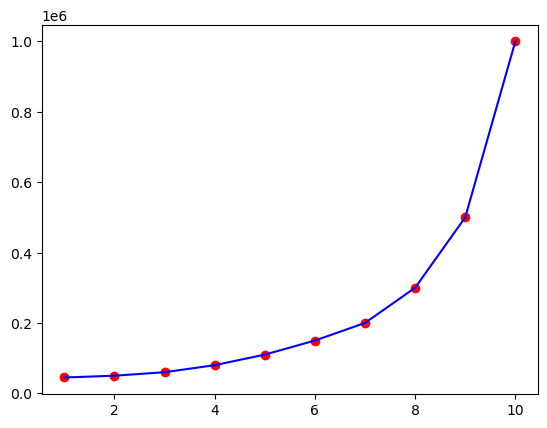

In [154]:
plt.scatter(X,y,color="r");
plt.plot(X,dec_regressor.predict(X),color="b");

In [155]:
X,y

(array([[ 1],
        [ 2],
        [ 3],
        [ 4],
        [ 5],
        [ 6],
        [ 7],
        [ 8],
        [ 9],
        [10]], dtype=int64),
 array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
         300000,  500000, 1000000], dtype=int64))

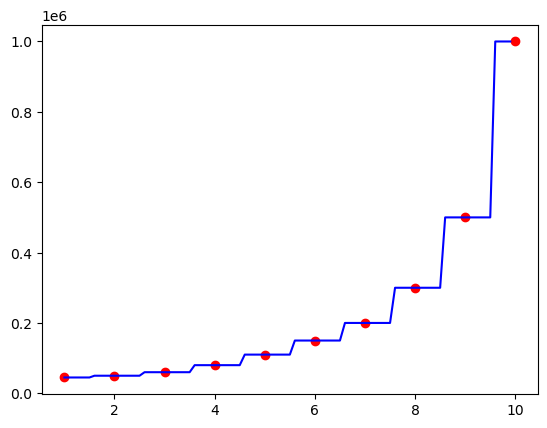

In [157]:
# Visualising in higher dimension
import numpy as np
X_grid = np.arange(min(X),max(X),0.1)
X_grid = X_grid.reshape((len(X_grid),1))
plt.scatter(X,y,color='r')
plt.plot(X_grid,dec_regressor.predict(X_grid), color='b');

## Random Forest Intuition

Version of ensemble learning - take multiple algorithms or same algorithms
multiple times and put them together 

In [158]:
df_rf  = pd.read_csv("Position_Salaries.csv")
df_rf.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [160]:
X = df_rf.drop(columns=["Position","Salary"],axis=1).values
y = df_rf.Salary.values

In [163]:
from sklearn.ensemble import RandomForestRegressor

rfrg = RandomForestRegressor(n_estimators=100)

rfrg.fit(X,y)

RandomForestRegressor()

In [164]:
rfrg.predict([[5]])

array([103600.])

## R squared estimator for regression

ordinary sum of squares -> sum of residuals

R<sup>2</sup> = 1 - (SS<sub>res</sub>/SS<sub>tot</sub>)

SS<sub>res</sub> = SUM(y<sub>i</sub> - Y<sub>pr</sub>)<sup>2</sup>

SS<sub>tot</sub> = SUM(y<sub>i</sub> - Y<sub>avg</sub>)<sup>2</sup>)

better the model fits the data smaller the residual sum of squares, Greater the
R<sup>2</sup>

## Adjusted R<sup>2</sup> intutition

R<sup>2</sup> ranges between 0 and 1

When we add a new variable(independent),

SS<sub>tot</sub> does not change - depends on average of the y, does not depend on y<sub>pr</sub> or (yHAT)
SS<sub>res</sub> does change - either decrease or stay the same - never increase

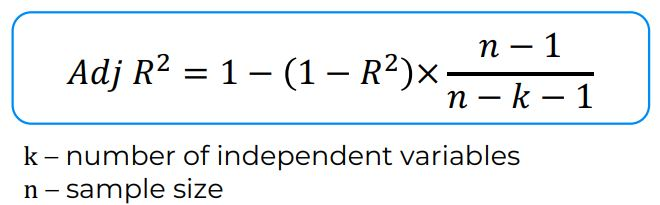